<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 12 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec Python
</h2>
    <h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">2ème partie : Entrainement et mise en production de l'algorithme de régression logistique</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement du fichier</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [6]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers de données</h3>
</div>

In [10]:
#Importation du fichier data_entrainement.csv
df_train = pd.read_csv('data_entrainement.csv')
X_train = df_train.drop(columns="is_genuine")
y_train = df_train["is_genuine"]

In [12]:
#Importation du fichier  xxxxxx.csv
nomcsv = 'P10-billets_test.csv'
df_inconnus = pd.read_csv(nomcsv)
df_inconnus.set_index('id', inplace=True)
X_test = df_inconnus

In [14]:
#Standardisons les données
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Application de la régression logistique </h2>
</div>

In [17]:
df_inconnus

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19
B_2,171.52,104.17,104.03,5.27,3.16,111.82
B_3,171.78,103.80,103.75,3.81,3.24,113.39
B_4,172.02,104.08,103.99,5.57,3.30,111.10
B_5,171.79,104.34,104.37,5.00,3.07,111.87


In [19]:
df_inconnus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, B_1 to B_5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
dtypes: float64(6)
memory usage: 280.0+ bytes


In [27]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007744]

**Tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité**

In [29]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.203355911582298e-36


**La p-valeur est inférieure à 5%, on rejette l'hypothèse selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité)**

In [31]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936252795074529, pvalue=6.214446750409788e-06)

**-->l'hypothèse de normalité est remise en cause (p-value << 0.05)**

*Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien :*

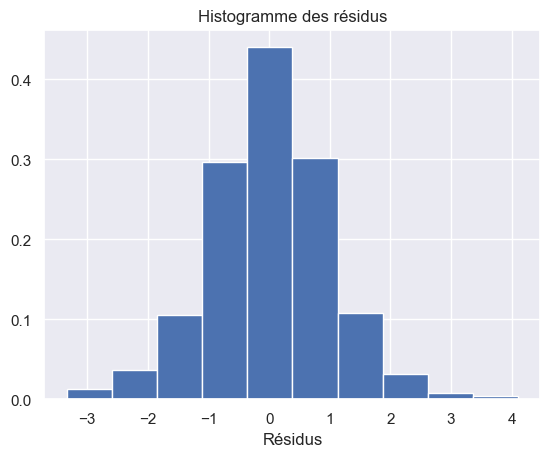

In [33]:
from numpy import sqrt as  sqrt
sns.set()
df['residu'] = reg_multi.resid
residus_std = df['residu']/sqrt(sum(df['residu']**2)/(len(df['residu'])-1))
plt.hist(residus_std, density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

In [35]:
# Prediction sur les margin_low vides
df_NaN = df_billets[df_billets["margin_low"].isna()].drop(columns="margin_low")
y_pred = reg_multi.predict(df_NaN)
y_pred

72      4.074248
99      4.097561
151     4.122994
197     3.995830
241     4.122994
251     4.137830
284     4.078487
334     4.127233
410     4.101800
413     4.093322
445     4.125114
481     4.188696
505     4.131472
611     4.063651
654     4.190815
675     4.220487
710     4.112397
739     4.108158
742     4.076367
780     4.099681
798     4.125114
844     4.129352
845     4.148427
871     4.112397
895     4.131472
919     4.216248
945     4.122994
946     4.070009
981     4.129352
1076    5.245925
1121    5.254403
1176    5.286194
1303    5.305269
1315    5.205657
1347    5.161149
1435    5.171746
1438    5.239567
dtype: float64

In [37]:
# Reconstituons les données avec les prédictions
df_NaN["margin_low"] = y_pred
df_NaN

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,True,171.94,103.89,103.45,3.25,112.79,4.074248
99,True,171.93,104.07,104.18,3.14,113.08,4.097561
151,True,172.07,103.80,104.38,3.02,112.93,4.122994
197,True,171.45,103.66,103.80,3.62,113.27,3.995830
241,True,171.83,104.14,104.06,3.02,112.36,4.122994
251,True,171.80,103.26,102.82,2.95,113.22,4.137830
284,True,171.92,103.83,103.76,3.23,113.29,4.078487
334,True,171.85,103.70,103.96,3.00,113.36,4.127233
410,True,172.56,103.72,103.51,3.12,112.95,4.101800
413,True,172.30,103.66,103.50,3.16,112.95,4.093322


In [39]:
df_complet = pd.concat([df, df_NaN])
df_complet.sort_index()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,residu
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0.369454
1,True,171.46,103.36,103.66,3.77,2.99,113.09,-0.359352
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.260051
3,True,171.36,103.91,103.94,3.62,3.01,113.51,-0.505114
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0.014498
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,-0.851358
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0.057985
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0.295866
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,-0.022940


**Comparons le jeu de données complété avec le jeu de données initiales**

In [41]:
display(df.describe())
df_complet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length,residu
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1.463000e+03
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757,1.351998e-15
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222,4.110464e-01
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000,-1.370821e+00
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000,-2.638627e-01
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000,-6.695606e-03
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000,2.594536e-01
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000,1.685866e+00


,diagonal,height_left,height_right,margin_low,margin_up,length,residu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1.463000e+03
mean,171.958440,104.029533,103.920307,4.482863,3.151473,112.67850,1.352909e-15
std,0.305195,0.299462,0.325627,0.659849,0.231813,0.87273,4.110464e-01
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000,-1.370821e+00
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000,-2.638627e-01
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000,-6.695606e-03
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000,2.594536e-01
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000,1.685866e+00


**--> Les caractéristiques de margin_low sont quasi identiques, nous utiliserons les données de la regression linéaire pour la suite**

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Entrainement de l'algorithme</h3>
</div>

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
clf = LogisticRegression()
cv_results = cross_validate(clf, X_train_std, y_train, cv=StratifiedKFold(n_splits=5))
print("accuracy mean : ",cv_results["test_score"].mean())

accuracy mean :  0.9906666666666666


In [23]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)
#Prédire avec le jeu de test
y_pred = clf.predict(X_test_std)

df_inconnus["is_genuine"] = y_pred
df_inconnus

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
id,,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19,1
B_2,171.52,104.17,104.03,5.27,3.16,111.82,0
B_3,171.78,103.80,103.75,3.81,3.24,113.39,1
B_4,172.02,104.08,103.99,5.57,3.30,111.10,0
B_5,171.79,104.34,104.37,5.00,3.07,111.87,0


In [25]:
df_inconnus.to_csv("Resultats_billets-test_Caroline_G.csv",index = False)